### Lab 18: GRU for Sentiment Analysis (IMDB Dataset)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6933 - loss: 0.5478 - val_accuracy: 0.7842 - val_loss: 0.4562
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8887 - loss: 0.2876 - val_accuracy: 0.8622 - val_loss: 0.3302
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9340 - loss: 0.1803 - val_accuracy: 0.8510 - val_loss: 0.3615
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9540 - loss: 0.1268 - val_accuracy: 0.8582 - val_loss: 0.4132
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9709 - loss: 0.0855 - val_accuracy: 0.8512 - val_loss: 0.4238

Test Accuracy: 0.8492


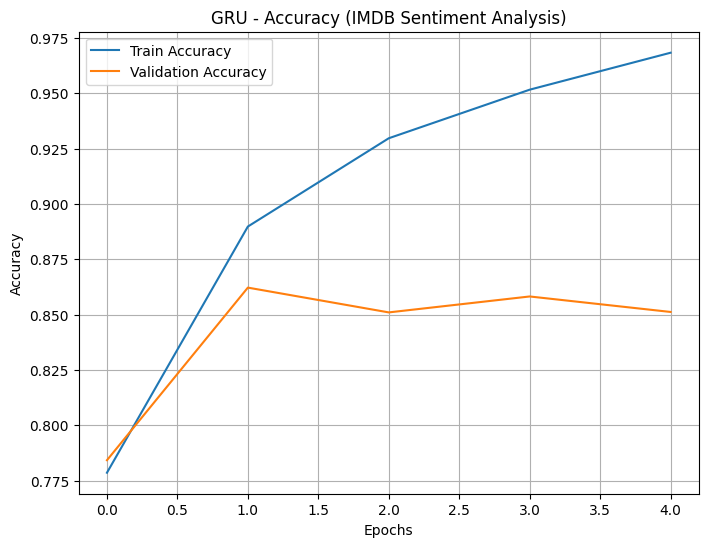

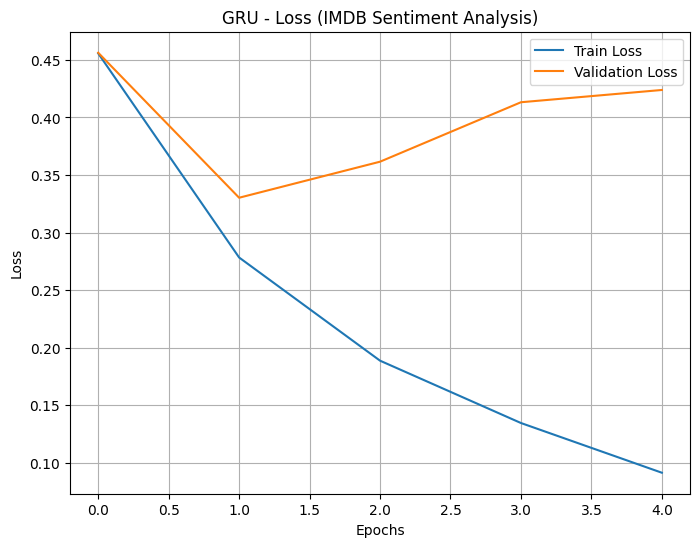

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


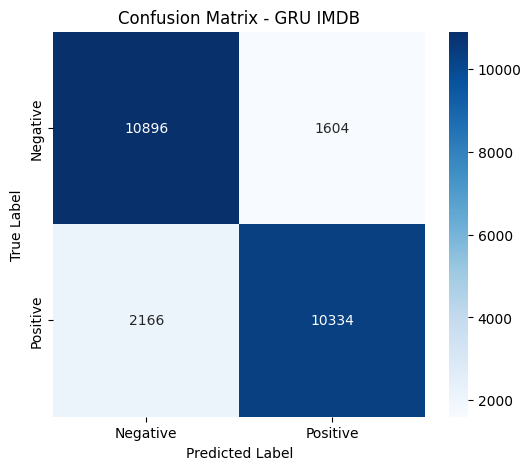


Classification Report - GRU IMDB
              precision    recall  f1-score   support

    Negative       0.83      0.87      0.85     12500
    Positive       0.87      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Load IMDB dataset
max_features = 10000   # Vocabulary size
max_len = 200          # Sequence length

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# 2. Build GRU Model
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    layers.GRU(64, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Train Model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

# 4. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 5. Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("GRU - Accuracy (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU - Loss (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 7. Predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
y_true = y_test.flatten()

# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - GRU IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Classification Report
print("\nClassification Report - GRU IMDB")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))
